# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [21]:
credit_grp = pd.cut(app_train['AMT_CREDIT'],25)

In [22]:
credit_grp.value_counts().sort_index()

(40995.0, 205200.0]       39451
(205200.0, 365400.0]      72398
(365400.0, 525600.0]      47112
(525600.0, 685800.0]      47428
(685800.0, 846000.0]      31449
(846000.0, 1006200.0]     20155
(1006200.0, 1166400.0]    19933
(1166400.0, 1326600.0]    12328
(1326600.0, 1486800.0]     6244
(1486800.0, 1647000.0]     4721
(1647000.0, 1807200.0]     3037
(1807200.0, 1967400.0]      752
(1967400.0, 2127600.0]     1269
(2127600.0, 2287800.0]      662
(2287800.0, 2448000.0]      157
(2448000.0, 2608200.0]      296
(2608200.0, 2768400.0]       76
(2768400.0, 2928600.0]        3
(2928600.0, 3088800.0]       11
(3088800.0, 3249000.0]        9
(3249000.0, 3409200.0]        6
(3409200.0, 3569400.0]        0
(3569400.0, 3729600.0]        2
(3729600.0, 3889800.0]        1
(3889800.0, 4050000.0]       11
Name: AMT_CREDIT, dtype: int64

### AMT_CREDIT_GROUP HIST

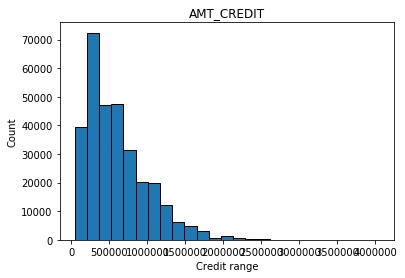

In [23]:
plt.hist(app_train['AMT_CREDIT'], edgecolor='k', bins=25)
plt.title('AMT_CREDIT')
plt.xlabel('Credit range')
plt.ylabel('Count')
plt.show()

### KDE, compare different kernel functions

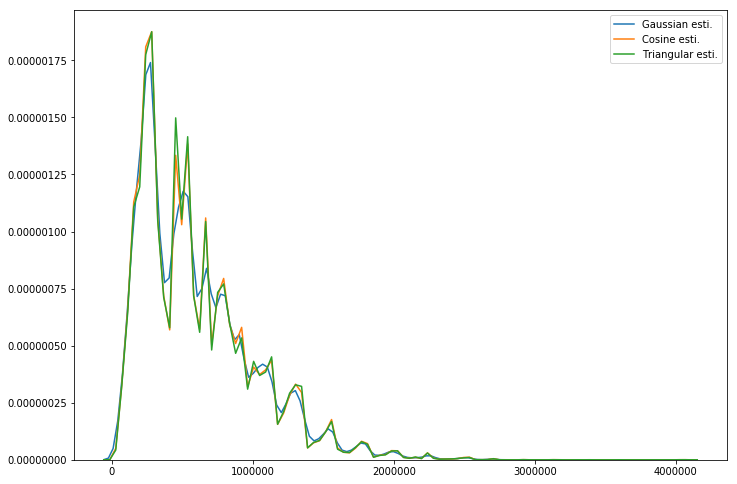

In [27]:
import seaborn as sns
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.kdeplot(ax=ax, data=app_train.loc[app_train['TARGET'] == 0, 'AMT_CREDIT'], label = 'Gaussian esti.', kernel='gau')
sns.kdeplot(ax=ax, data=app_train.loc[app_train['TARGET'] == 0, 'AMT_CREDIT'], label = 'Cosine esti.', kernel='cos')
sns.kdeplot(ax=ax, data=app_train.loc[app_train['TARGET'] == 0, 'AMT_CREDIT'], label = 'Triangular esti.', kernel='tri')
plt.show()

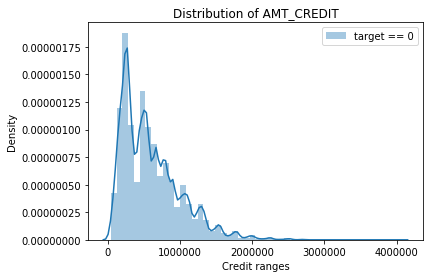

In [32]:
sns.distplot(app_train.loc[app_train['TARGET'] == 0, 'AMT_CREDIT' ], label = 'target == 0')
plt.legend()
plt.xlabel('Credit ranges')
plt.ylabel('Density')
plt.title('Distribution of AMT_CREDIT')
plt.show()

Text(0.5, 1.0, 'AMT_CREDIT_DISCRET to TARGET bar plot')

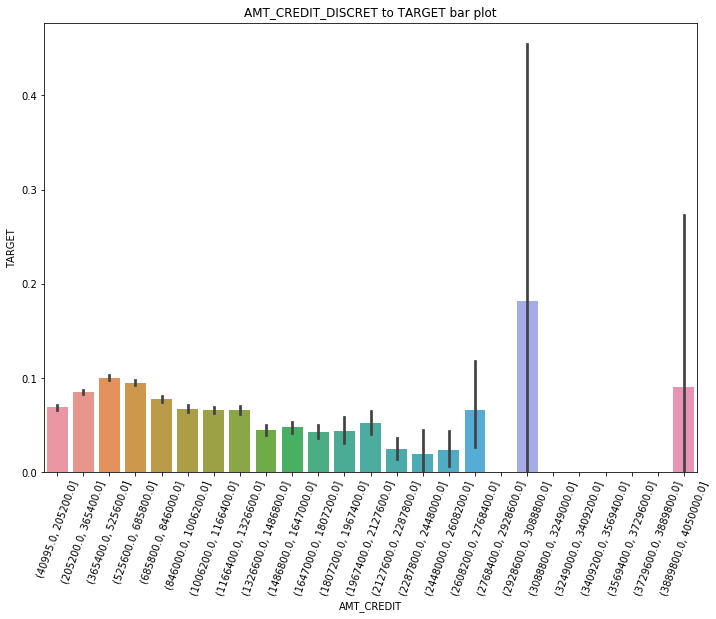

In [36]:
plt.figure(figsize=(11.7, 8.27))
ax = sns.barplot(credit_grp,app_train['TARGET'])
plt.xticks(rotation=70)
ax.set_title('AMT_CREDIT_DISCRET to TARGET bar plot')